In [1]:
import numpy as np
import pandas as pd
# I get the data and sort it in MATLAB, and save the data as Excel file. Each file contains one-year data.

In [18]:
# The yearly data are from 2005 to 2015. There are 10 gourps(features in this year with return in next year).
# choose companies listed before 2005, and remove those company whose data is not complete. Then 1037 stocks are considered.
# I choose 13 factors(all fundmental factors) according to some analysis reports, including total market value, EPS, BPS
# 12-month swing, 100-week volitility, 3-year net income growth, 3-year revenue growth, 60-day price change, 
# 120-day price change, 240-day price change, operating income, total current assets, and account receivable.
data1=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data1.xlsx')
data2=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data2.xlsx')
data3=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data3.xlsx')
data4=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data4.xlsx')
data5=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data5.xlsx')
data6=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data6.xlsx')
data7=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data7.xlsx')
data8=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data8.xlsx')
data9=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data9.xlsx')
data10=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\data10.xlsx')
index=pd.read_excel(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\data\index.xlsx')    # the market index(CSI 800 Index)
data1

,StockCodes,EV,BPS,EPS_BASIC,ANNUALSTDEVR_100W,GROWTH_PROFIT,GROWTH_OR,OPPROFIT,TOT_CUR_ASSET',ACCT_RCV,SWING,PCT_CHG_ND60,PCT_CHG_ND120,PCT_CHG_ND240,PCT_CHG
0,"""000002.SZ""",1.650737e+10,2.2320,0.3900,34.773376,260.113505,130.826882,1.958371e+09,1.988493e+10,3.773077e+08,52.305130,20.055710,34.687500,22.016548,267.298300
1,"""000004.SZ""",3.476635e+08,1.0070,-0.1620,52.006470,-326.202594,-49.369837,-2.188818e+07,1.192909e+08,3.695821e+07,55.947137,-12.658228,5.343511,-39.473684,23.792271
2,"""000005.SZ""",1.162205e+09,0.9320,-0.2540,39.436798,-92.090616,-17.377036,-2.208914e+08,3.495288e+08,6.462008e+06,60.000000,6.493506,29.133858,-24.770642,150.518305
3,"""000007.SZ""",4.623716e+08,0.6100,0.0600,58.342869,20.231038,54.226922,1.444169e+06,3.828837e+08,9.006499e+06,66.568047,-18.481013,0.625000,-9.039548,14.236030
4,"""000009.SZ""",2.214851e+09,1.2400,0.0749,35.732456,229.446544,101.744767,1.536311e+08,3.567706e+09,1.124214e+08,57.142857,-4.149378,14.356436,-32.653061,83.116883
5,"""000010.SZ""",4.145892e+08,0.4000,-0.5500,46.606075,-351.670451,-11.135837,-4.600583e+07,1.936463e+08,4.887380e+07,69.594595,-9.615385,9.302326,-38.293217,90.425532
6,"""000011.SZ""",2.654455e+09,1.1834,0.1500,54.052261,126.501497,23.320053,1.097574e+08,1.411568e+09,6.630867e+07,71.578947,2.352941,23.990499,34.190231,9.195402
7,"""000012.SZ""",3.823211e+09,2.4400,0.3100,41.102566,113.928343,118.117581,4.128650e+08,9.467453e+08,2.868500e+08,48.769697,-7.042254,43.034056,-10.843621,229.988536
8,"""000014.SZ""",5.952544e+08,3.5037,0.3500,37.692436,-14.036698,-7.764488,3.856363e+07,9.032595e+08,5.934997e+06,56.302671,2.945736,43.722944,15.959894,108.364482
9,"""000016.SZ""",1.782965e+09,5.3340,0.1190,33.535954,-58.337476,42.456928,3.988611e+07,7.666411e+09,6.773642e+08,46.481481,-6.631300,3.834808,-34.693878,47.727288


In [19]:
index

,CLOSE,PCT_CHG
0,898.7830,-8.650517
1,1948.9010,116.837768
2,5205.7370,167.111413
3,1824.4000,-64.954050
4,3715.3590,103.648268
5,3443.5760,-7.315121
6,2500.6520,-27.382117
7,2645.8580,5.806726
8,2589.3530,-2.135602
9,3839.3850,48.275843


In [4]:
# Compute the IC ratio of these 13 factors (|IC|>0.4% mean the factor is very good)
ic=[]
for i in range(1,8):
    factors="data"+str(i)
    data_factortest=eval(factors)
    ic1=[]
    for j in range(1,14):
        rho=np.corrcoef(data_factortest.iloc[:,j],data_factortest.iloc[:,-1])[0][1]
        ic1.append(rho)
    ic.append(ic1)
IC=np.mean(ic,axis=0)
print('IC of these 13 factors are:')
print(IC)

IC of these 13 factors are:
[-0.02015432 -0.02311839  0.04358674 -0.08281198 -0.01486751  0.00271387
 -0.00480227 -0.01506075 -0.0182069  -0.12896975  0.01451867 -0.02970031
 -0.07475318]


In [5]:
# Show the monotony of these factors by graph (the more evident monotonic graph means the better factor)
# compute the return in each year for every group and every factor
FactorMonotonyTest=[]
for i in range(1,8):
    factors="data"+str(i)
    data_factortest=eval(factors)
    ret_factor=data_factortest.iloc[:,-1]
    GroupReturn=[]
    for j in range(1,14):
        order=np.argsort(data_factortest.iloc[:,j])
        ret_factor_order=[ret_factor[t] for t in order]
        group=np.floor(len(order)/10)
        GroupReturn_k=[]
        for k in range(1,10):
            gr=np.mean(ret_factor_order[int(1+(k-1)*group):int(k*group+1)])
            GroupReturn_k.append(1+gr/100)
        gr=np.mean(ret_factor_order[int((k+1)*group):])
        GroupReturn_k.append(1+gr/100)
        GroupReturn.append(GroupReturn_k)
    FactorMonotonyTest.append(GroupReturn)

MonotonyReturn=[]
for j in range(len(FactorMonotonyTest[1])):
    GroupReturnMat=[FactorMonotonyTest[t][j] for t in range(0,7)]
    FactorMonotonyReturn=[1,1,1,1,1,1,1,1,1,1]
    for k in range(len(GroupReturnMat)):
        FactorMonotonyReturn=[a*b for a, b in zip(FactorMonotonyReturn,GroupReturnMat[k])]
    Ave_FactorMonotonyReturn=[r**(1/len(GroupReturnMat))-1 for r in FactorMonotonyReturn]
    MonotonyReturn.append(Ave_FactorMonotonyReturn)

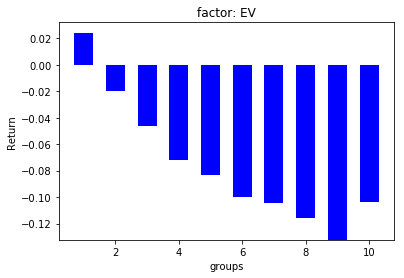

In [6]:
# plot some factors to show the monotony
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 
X=range(1,11)
Y=MonotonyReturn[0]
fig = plt.figure()  
plt.bar(X,Y,0.6,color="blue")  
plt.xlabel("groups")  
plt.ylabel("Return")  
plt.title("factor: EV")  
plt.show()

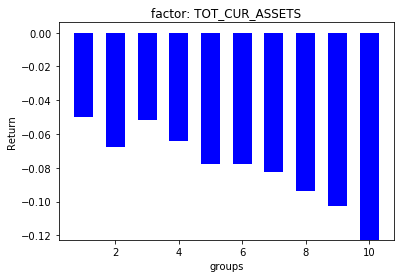

In [7]:
Y=MonotonyReturn[7]
fig = plt.figure()  
plt.bar(X,Y,0.6,color="blue")  
plt.xlabel("groups")  
plt.ylabel("Return")  
plt.title("factor: TOT_CUR_ASSETS")  
plt.show()

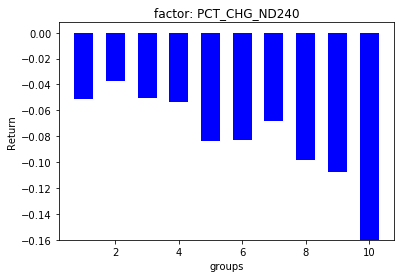

In [8]:
Y=MonotonyReturn[12]
fig = plt.figure()  
plt.bar(X,Y,0.6,color="blue")  
plt.xlabel("groups")  
plt.ylabel("Return")  
plt.title("factor: PCT_CHG_ND240")  
plt.show()

In [9]:
# from the pictures above we can see good Monotonicity

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [10]:
# in each year, use the current-year data as training data, and the next-year data as testing data.
# As we'll adjust the method after seeing the result, the last 2-year data is remianed for final prediction test.
accuracy=[]
accuracy_pca=[]
for i in range(1,8):       # choose 8 out of 10 years
    s_train="data"+str(i)  # current-year data for training
    data_train=eval(s_train)
    X_train,Y_train=data_train.iloc[:,1:14].values,data_train.iloc[:,-1].values
    s_test="data"+str(i+1) # next-year data for testing
    data_test=eval(s_test)
    X_test,Y_test=data_test.iloc[:,1:14].values,data_test.iloc[:,-1].values
    
    s=StandardScaler()
    X_train_std=s.fit_transform(X_train)
    X_test_std=s.fit_transform(X_test)
    
    Y_train=Y_train>index['PCT_CHG'][i]
    Y_test=Y_test>index['PCT_CHG'][i+1]
    
    svm_linear=SVC(kernel='linear',C=1.0,random_state=0)
    svm_linear.fit(X_train_std,Y_train)
    
    score1=svm_linear.score(X_test_std,Y_test)
    accuracy.append(score1)   # the accuracy result by SVM
    
    pipe_svm_pca = Pipeline([('scl', StandardScaler()),
                         ('pca', PCA(n_components=2)),
                    ('clf', SVC(kernel='linear', C=1.0, random_state=0))])
    pipe_svm_pca.fit(X_train_std,Y_train)
    score2=pipe_svm_pca.score(X_test_std,Y_test)
    accuracy_pca.append(score2)

[accuracy,accuracy_pca]

[[0.45033751205400191,
  0.61523625843780139,
  0.17550626808100289,
  0.38283510125361619,
  0.38572806171648988,
  0.94503375120540023,
  0.38090646094503378],
 [0.45130183220829317,
  0.61909353905496622,
  0.070395371263259399,
  0.38187078109932499,
  0.3741562198649952,
  0.95274831243973002,
  0.38090646094503378]]

In [ ]:
# However the answer is much different from MATLAB result.
#accuracy
#[0.446480231436837
#0.591128254580521
#0.661523625843780
#0.586306653809065
#0.469623915139826
#0.525554484088717
#0.641272902603664]   the mean accuracy is 0.5603, which is an acceptable pattern to set up a strategy.

In [11]:
print('SVM train accuracy : %.3f' %np.mean(accuracy))
print('SVM(with PCA) train accuracy : %.3f' %np.mean(accuracy_pca))

SVM train accuracy : 0.477
SVM(with PCA) train accuracy : 0.461


In [12]:
# To furthur test these factors. in each loop, eliminating one factor and calculate the test accuracy, if the accuracy 
# increases, the factor would be eliminated from the model.
accuracy_el=[]
for i in range(1,8):
    s_train="data"+str(i)
    data_train=eval(s_train)
    X_train,Y_train=data_train.iloc[:,1:14].values,data_train.iloc[:,-1].values
    s_test="data"+str(i+1)
    data_test=eval(s_test)
    X_test,Y_test=data_test.iloc[:,1:14].values,data_test.iloc[:,-1].values
    
    s=StandardScaler()
    X_train_std=s.fit_transform(X_train)
    X_test_std=s.fit_transform(X_test)
    
    Y_train=Y_train>index['PCT_CHG'][i]
    Y_test=Y_test>index['PCT_CHG'][i+1]
    accuracy_j=[]
    for j in range(0,13):
        X_train_std_el=np.array([[row[k] for k in range(0, 13) if k != j] for row in X_train_std])   # remove the jth factor's data
        X_test_std_el=np.array([[row[k] for k in range(0, 13) if k != j] for row in X_test_std]) 

        svm_linear=SVC(kernel='linear',C=1.0,random_state=0)
        svm_linear.fit(X_train_std_el,Y_train)
        score3=svm_linear.score(X_test_std_el,Y_test)
        accuracy_j.append(score3)
    accuracy_el.append(accuracy_j)

isredundant=np.mean(accuracy_el,axis=0)-np.mean(accuracy)>0
redundant=[]
for i in range(len(isredundant)):
    if isredundant[i]:
        redundant.append(i)
redundant

[2, 4, 5, 6, 7]

In [ ]:
# After test, only 8 faactors left,total market value, BPS, 12-month swing, 100-week volitility,
# 60-day price change, 120-day price change, 240-day price change,  and account receivable.

In [13]:
# final (prediction) test
LongPortReturn=[];
accuracy_rest=[]
for i in range(1,10):
    s_train="data"+str(i)
    data_train=eval(s_train)
    X_train,Y_train=data_train.iloc[:,1:14].values,data_train.iloc[:,-1].values
    s_test="data"+str(i+1)
    data_test=eval(s_test)
    X_test,Y_test=data_test.iloc[:,1:14].values,data_test.iloc[:,-1].values
    
    s=StandardScaler()
    X_train_std=s.fit_transform(X_train)
    X_test_std=s.fit_transform(X_test)
    
    Y_train=Y_train>index['PCT_CHG'][i]
    Y_test=Y_test>index['PCT_CHG'][i+1]
    X_train_std_rest=np.array([[row[k] for k in range(0, 13) if (not k in redundant)] for row in X_train_std]) 
    X_test_std_rest=np.array([[row[k] for k in range(0, 13) if (not k in redundant)] for row in X_test_std]) 

    svm_linear=SVC(kernel='linear',C=1.0,random_state=0)
    svm_linear.fit(X_train_std_rest,Y_train)
    score4=svm_linear.score(X_test_std_rest,Y_test)
    accuracy_rest.append(score4)
    
    # to prepare for the strategy after, get each year's return of buying stocks that performed better than the index
    NextReturn=data_test.iloc[:,-1]
    g=svm_linear.predict(X_test_std_rest)
    long=[]
    short=[]
    for j in range(len(g)):
        if g[j]==True:
            long.append(NextReturn[j])
        else:
            short.append(NextReturn[j])
    LongPortReturn.append(np.mean(long)/100)
    
accuracy_rest

D:\software\Python\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\software\Python\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.45033751205400191,
 0.62680810028929601,
 0.17839922854387658,
 0.38187078109932499,
 0.37608486017357762,
 0.95178399228543875,
 0.38090646094503378,
 0.47637415621986501,
 0.38283510125361619]

In [14]:
print('SVM(with remained factors) prediction accuracy : %.3f' %np.mean(accuracy_rest))
# The result is much different from MATLAB(0.567), too.

SVM(with remained factors) prediction accuracy : 0.467


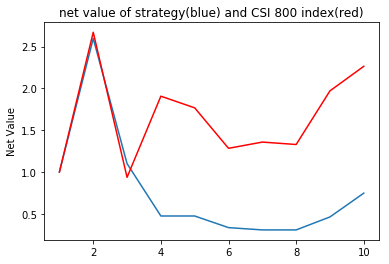

In [16]:
# From the result, the predition accuracy is stably higher than 50%(in MATLAB). Thus we can construct a investing strategy
# Just test a direct and easy one. Buy all the stocks that is predicted to be better than the index in euqal weight.
# the calculation and result are original in MATLAB file.
LongPortReturn[3]=0
LongPortReturn[6]=0
NV=1
NV_cum=[1]
index_chg=index['PCT_CHG'][2:]
NV_index=1
NV_index_cum=[1]
for i in range(len(LongPortReturn)):
    NV=NV*(1+LongPortReturn[i])
    NV_cum.append(NV)
    NV_index=NV_index*(1+index_chg[i+2]/100)
    NV_index_cum.append(NV_index)

plt.plot(range(1,11),NV_cum)
plt.plot(range(1,11),NV_index_cum,'r-')
plt.ylabel('Net Value')
plt.title('net value of strategy(blue) and CSI 800 index(red)')
plt.show()

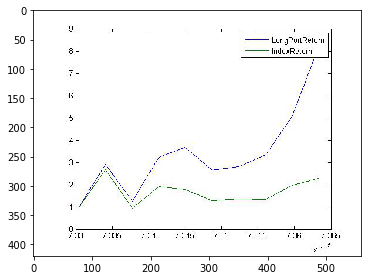

In [17]:
# As in Python here, the prediction results(blue line is the net value of the strategy portfolio, and the red line is the index)
# are much worse than I get in Matlab(it may because I made some coding mistakes in Python but didn't find them)
# the strategy results are much better in my Matlab prediction, which was obtained by the same method, as shown below
from skimage import io
img=io.imread(r'C:\Users\Fu\Documents\GitHub\2016.M3.TQF-ML.relative-stock-price-prediction-by-multi-factor-model\strategy_result.jpg')
io.imshow(img)
io.show()

In [ ]:
# in the above picture, the higher blue line is the net value of the strategy and the lower green line is CSI 800 index.